In [385]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    print("Own install")
    sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                     '../../../..',  '../../../../3rdparty',
                     '../../..',     '../../../3rdparty',
                     '../..',        '../../3rdparty',
                     '..',           '../3rdparty' ]
    
else: # In colab
    ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
    sys.path.append('./Jove')
    sys.path.append('./Jove/jove')

# -- common imports --
from jove.PcpJupyterNew import *
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
from jove.JoveEditor import *
from jove.AnimateTM import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Question 1 (30 points):

## The TM design is *15 points* for a well-documented TM

## Passing the given tests fetches 2 points each - total *10 points*

## Each test you add (5 requested) that passes fetches 1 point each - total *5 points*

## Strive to make three of your tests involve input strings of length 10 or more (to avoid having entirely short tests)

- Design a deterministic Turing machine (DTM) over the input alphabet Σ = {a, b, #} for the language of all strings of the form w#x where w, x ∈ {a, b}∗ and w is a substring of x. See the definition of substring here: https://en.wikipedia.org/wiki/Substring

- You must design a deterministic Turing machine which absolutely has no non-determinism anywhere in its state transitions. A deterministic algorithm here requires searching for all w beginnings within x. A correct design will have a deterministic polynomial runtime.

- Add 5 more tests of your own.

### Test Cases: The "fuel" argument of 50 may be increased as needed (start with 50 and that is good if all tests finish)

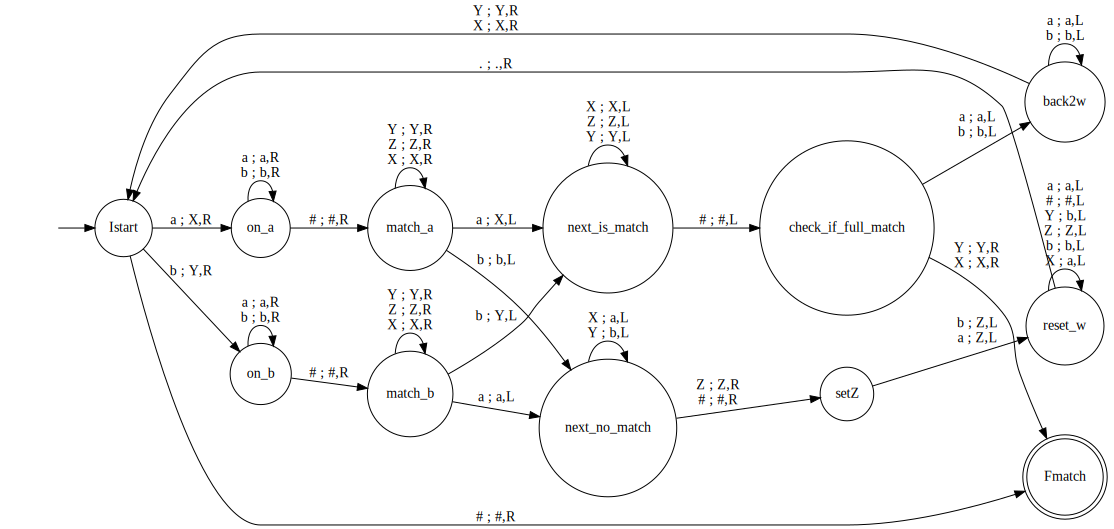

In [386]:
Asg6DTM = md2mc(
'''
TM 
!!---------------------------------------------------------------------------
!! This is a DTM for recognizing strings of the form w#x 
!! where w, x are in {a,b}* and w is a substring of x
!!---------------------------------------------------------------------------

!!---------------------------------------------------------------------------
!! State : rd;wr , mv -> tostates !! comment
!!---------------------------------------------------------------------------

Istart : a;X , R -> on_a    !! convert a to X and search for matching a on other side of #
Istart : b;Y , R  -> on_b   !! convert b to b and search for matching b on other side of #		  
Istart : #;# , R -> Fmatch  !! If we see # right away, then w is epsilon and therefore in x		  				  


!! In on_a, skip over the remaining a's and b's
!! until we get to the #
on_a : a;a , R | b;b , R -> on_a 
on_a : #;# , R  -> match_a      


!! Check for a matching 'a' on the other side
match_a : X;X , R | Y;Y , R -> match_a  !! All X and Y are matched characters to skip over
match_a : Z;Z , R -> match_a            !! All Z's are not part of w

match_a : a;X , L  -> next_is_match     !! Turn the matching a to an X, then return to the w string

match_a : b;b , L -> next_no_match      !! on a b, we know the current substring is not w


!! Move over all past X, Y, Z to get back to the # on the way to the w string
next_is_match : X;X , L | Y;Y , L | Z;Z , L -> next_is_match 
next_is_match : #;# , L  -> check_if_full_match
				  

check_if_full_match : a;a , L | b;b , L -> back2w !! If there are still letters to match, move to back2w
check_if_full_match : X;X , R | Y;Y , R -> Fmatch !! If there's an X or Y at the end of w, then we have a complete match


!! return to the end of the w string to check the next character
back2w : a;a , L | b;b , L -> back2w
back2w : X;X , R | Y;Y , R -> Istart


!! same as on_a, but for for a 'b' instead of an 'a'
on_b : a;a , R | b;b , R -> on_b
on_b : #;# , R  -> match_b


!! search for matching b on the other side
match_b : X;X , R | Y;Y , R -> match_b  !! X, Y, and Z are already checked
match_b : Z;Z , R -> match_b

match_b : b;Y , L  -> next_is_match     !! b is a match

match_b : a;a , L -> next_no_match      !! a is not a match


!! reset X's and Y's in the potential w to a's and b's so we can try again
next_no_match : X;a , L -> next_no_match
next_no_match : Y;b , L -> next_no_match
next_no_match : Z;Z , R -> setZ
next_no_match : #;# , R -> setZ


setZ : a;Z , L | b;Z , L -> reset_w  !! set the current one to Z (because it's not part of w) then to go reset_w


reset_w : Z;Z , L -> reset_w  !! reset the X/Y changes to the w string and look for it again after the Z's
reset_w : #;# , L -> reset_w
reset_w : X;a , L -> reset_w
reset_w : Y;b , L -> reset_w
reset_w : a;a , L -> reset_w
reset_w : b;b , L -> reset_w

reset_w : .;. , R -> Istart

'''   
    
)

dotObj_tm(Asg6DTM, FuseEdges = True)

In [387]:
help(explore_tm)
# DO_dtmwhw = dotObj_tm(Asg6DTM, FuseEdges=True)
# DO_dtmwhw.render('Asg6DTM')
# DO_dtmwhw

Help on function explore_tm in module jove.Def_TM:

explore_tm(T, tape, nsteps)
    A handy routine to print the result of run_tm plus making 
    future extensions to explore run-results.



In [388]:
explore_tm(Asg6DTM, "aba#aba",50)
# accept because w == x

Detailing the halted configs now.
Accepted at  ('Fmatch', 3, 'XYX#XYX', 23)
 via .. 
 ->('Istart', 0, 'aba#aba', 50)
 ->('on_a', 1, 'Xba#aba', 49)
 ->('on_a', 2, 'Xba#aba', 48)
 ->('on_a', 3, 'Xba#aba', 47)
 ->('match_a', 4, 'Xba#aba', 46)
 ->('next_is_match', 3, 'Xba#Xba', 45)
 ->('check_if_full_match', 2, 'Xba#Xba', 44)
 ->('back2w', 1, 'Xba#Xba', 43)
 ->('back2w', 0, 'Xba#Xba', 42)
 ->('Istart', 1, 'Xba#Xba', 41)
 ->('on_b', 2, 'XYa#Xba', 40)
 ->('on_b', 3, 'XYa#Xba', 39)
 ->('match_b', 4, 'XYa#Xba', 38)
 ->('match_b', 5, 'XYa#Xba', 37)
 ->('next_is_match', 4, 'XYa#XYa', 36)
 ->('next_is_match', 3, 'XYa#XYa', 35)
 ->('check_if_full_match', 2, 'XYa#XYa', 34)
 ->('back2w', 1, 'XYa#XYa', 33)
 ->('Istart', 2, 'XYa#XYa', 32)
 ->('on_a', 3, 'XYX#XYa', 31)
 ->('match_a', 4, 'XYX#XYa', 30)
 ->('match_a', 5, 'XYX#XYa', 29)
 ->('match_a', 6, 'XYX#XYa', 28)
 ->('next_is_match', 5, 'XYX#XYX', 27)
 ->('next_is_match', 4, 'XYX#XYX', 26)
 ->('next_is_match', 3, 'XYX#XYX', 25)
 ->('check_if_full_ma

In [389]:
explore_tm(Asg6DTM, "aba#ab",50)
# reject because |w| > |x|

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('match_a', 6, 'XYX#XY', 28)
 via .. 
 ->('Istart', 0, 'aba#ab', 50)
 ->('on_a', 1, 'Xba#ab', 49)
 ->('on_a', 2, 'Xba#ab', 48)
 ->('on_a', 3, 'Xba#ab', 47)
 ->('match_a', 4, 'Xba#ab', 46)
 ->('next_is_match', 3, 'Xba#Xb', 45)
 ->('check_if_full_match', 2, 'Xba#Xb', 44)
 ->('back2w', 1, 'Xba#Xb', 43)
 ->('back2w', 0, 'Xba#Xb', 42)
 ->('Istart', 1, 'Xba#Xb', 41)
 ->('on_b', 2, 'XYa#Xb', 40)
 ->('on_b', 3, 'XYa#Xb', 39)
 ->('match_b', 4, 'XYa#Xb', 38)
 ->('match_b', 5, 'XYa#Xb', 37)
 ->('next_is_match', 4, 'XYa#XY', 36)
 ->('next_is_match', 3, 'XYa#XY', 35)
 ->('check_if_full_match', 2, 'XYa#XY', 34)
 ->('back2w', 1, 'XYa#XY', 33)
 ->('Istart', 2, 'XYa#XY', 32)
 ->('on_a', 3, 'XYX#XY', 31)
 ->('match_a', 4, 'XYX#XY', 30)
 ->('match_a', 5, 'XYX#XY', 29)
 ->('match_a', 6, 'XYX#XY', 28)


In [390]:
explore_tm(Asg6DTM, "aba#baba",50)
# accept because x ends with w

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('Fmatch', 11, '........XYX#ZXYX', 5)
 via .. 
 ->('Istart', 0, 'aba#baba', 50)
 ->('on_a', 1, 'Xba#baba', 49)
 ->('on_a', 2, 'Xba#baba', 48)
 ->('on_a', 3, 'Xba#baba', 47)
 ->('match_a', 4, 'Xba#baba', 46)
 ->('next_no_match', 3, 'Xba#baba', 45)
 ->('setZ', 4, 'Xba#baba', 44)
 ->('reset_w', 3, 'Xba#Zaba', 43)
 ->('reset_w', 2, 'Xba#Zaba', 42)
 ->('reset_w', 1, 'Xba#Zaba', 41)
 ->('reset_w', 0, 'Xba#Zaba', 40)
 ->('reset_w', 7, '........aba#Zaba', 39)
 ->('Istart', 8, '........aba#Zaba', 38)
 ->('on_a', 9, '........Xba#Zaba', 37)
 ->('on_a', 10, '........Xba#Zaba', 36)
 ->('on_a', 11, '........Xba#Zaba', 35)
 ->('match_a', 12, '........Xba#Zaba', 34)
 ->('match_a', 13, '........Xba#Zaba', 33)
 ->('next_is_match', 12, '........Xba#ZXba', 32)
 ->('next_is_match', 11, '........Xba#ZXba', 31)
 ->('check_if_full_match', 10, '........Xba#ZXba', 30)
 ->('back2w', 9, '........Xba#ZXba', 29)
 ->('back2w', 8, '

In [391]:
explore_tm(Asg6DTM, "aba#babba",150)
# reject because w is not in x

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('match_b', 17, '........XYa#ZZZZX', 41)
 via .. 
 ->('Istart', 0, 'aba#babba', 150)
 ->('on_a', 1, 'Xba#babba', 149)
 ->('on_a', 2, 'Xba#babba', 148)
 ->('on_a', 3, 'Xba#babba', 147)
 ->('match_a', 4, 'Xba#babba', 146)
 ->('next_no_match', 3, 'Xba#babba', 145)
 ->('setZ', 4, 'Xba#babba', 144)
 ->('reset_w', 3, 'Xba#Zabba', 143)
 ->('reset_w', 2, 'Xba#Zabba', 142)
 ->('reset_w', 1, 'Xba#Zabba', 141)
 ->('reset_w', 0, 'Xba#Zabba', 140)
 ->('reset_w', 7, '........aba#Zabba', 139)
 ->('Istart', 8, '........aba#Zabba', 138)
 ->('on_a', 9, '........Xba#Zabba', 137)
 ->('on_a', 10, '........Xba#Zabba', 136)
 ->('on_a', 11, '........Xba#Zabba', 135)
 ->('match_a', 12, '........Xba#Zabba', 134)
 ->('match_a', 13, '........Xba#Zabba', 133)
 ->('next_is_match', 12, '........Xba#ZXbba', 132)
 ->('next_is_match', 11, '........Xba#ZXbba', 131)
 ->('check_if_full_match', 10, 

In [392]:
explore_tm(Asg6DTM, "bba#bbabba",50)
# accept because x starts and ends with w

Detailing the halted configs now.
Accepted at  ('Fmatch', 3, 'YYX#YYXbba', 23)
 via .. 
 ->('Istart', 0, 'bba#bbabba', 50)
 ->('on_b', 1, 'Yba#bbabba', 49)
 ->('on_b', 2, 'Yba#bbabba', 48)
 ->('on_b', 3, 'Yba#bbabba', 47)
 ->('match_b', 4, 'Yba#bbabba', 46)
 ->('next_is_match', 3, 'Yba#Ybabba', 45)
 ->('check_if_full_match', 2, 'Yba#Ybabba', 44)
 ->('back2w', 1, 'Yba#Ybabba', 43)
 ->('back2w', 0, 'Yba#Ybabba', 42)
 ->('Istart', 1, 'Yba#Ybabba', 41)
 ->('on_b', 2, 'YYa#Ybabba', 40)
 ->('on_b', 3, 'YYa#Ybabba', 39)
 ->('match_b', 4, 'YYa#Ybabba', 38)
 ->('match_b', 5, 'YYa#Ybabba', 37)
 ->('next_is_match', 4, 'YYa#YYabba', 36)
 ->('next_is_match', 3, 'YYa#YYabba', 35)
 ->('check_if_full_match', 2, 'YYa#YYabba', 34)
 ->('back2w', 1, 'YYa#YYabba', 33)
 ->('Istart', 2, 'YYa#YYabba', 32)
 ->('on_a', 3, 'YYX#YYabba', 31)
 ->('match_a', 4, 'YYX#YYabba', 30)
 ->('match_a', 5, 'YYX#YYabba', 29)
 ->('match_a', 6, 'YYX#YYabba', 28)
 ->('next_is_match', 5, 'YYX#YYXbba', 27)
 ->('next_is_match', 4, 

### 5 Tests You Add:

In [393]:
# Test 1
explore_tm(Asg6DTM, "a#bbbbbbbbba",200)
# accept because w is at the end of x

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('Fmatch', 9, '........X#ZZZZZZZZZX', 33)
 via .. 
 ->('Istart', 0, 'a#bbbbbbbbba', 200)
 ->('on_a', 1, 'X#bbbbbbbbba', 199)
 ->('match_a', 2, 'X#bbbbbbbbba', 198)
 ->('next_no_match', 1, 'X#bbbbbbbbba', 197)
 ->('setZ', 2, 'X#bbbbbbbbba', 196)
 ->('reset_w', 1, 'X#Zbbbbbbbba', 195)
 ->('reset_w', 0, 'X#Zbbbbbbbba', 194)
 ->('reset_w', 7, '........a#Zbbbbbbbba', 193)
 ->('Istart', 8, '........a#Zbbbbbbbba', 192)
 ->('on_a', 9, '........X#Zbbbbbbbba', 191)
 ->('match_a', 10, '........X#Zbbbbbbbba', 190)
 ->('match_a', 11, '........X#Zbbbbbbbba', 189)
 ->('next_no_match', 10, '........X#Zbbbbbbbba', 188)
 ->('setZ', 11, '........X#Zbbbbbbbba', 187)
 ->('reset_w', 10, '........X#ZZbbbbbbba', 186)
 ->('reset_w', 9, '........X#ZZbbbbbbba', 185)
 ->('reset_w', 8, '........X#ZZbbbbbbba', 184)
 ->('reset_w', 7, '........a#ZZbbbbbbba', 183)
 ->('Istart', 8, '........a#ZZbbbbbbba', 182)
 ->('on_a', 9, '........

In [394]:
# Test 2
explore_tm(Asg6DTM, "aaaba#aabaaaaaba",400)
# accept because x ends in w

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('Fmatch', 13, '........XXXYX#ZZZZZXXXYX', 15)
 via .. 
 ->('Istart', 0, 'aaaba#aabaaaaaba', 400)
 ->('on_a', 1, 'Xaaba#aabaaaaaba', 399)
 ->('on_a', 2, 'Xaaba#aabaaaaaba', 398)
 ->('on_a', 3, 'Xaaba#aabaaaaaba', 397)
 ->('on_a', 4, 'Xaaba#aabaaaaaba', 396)
 ->('on_a', 5, 'Xaaba#aabaaaaaba', 395)
 ->('match_a', 6, 'Xaaba#aabaaaaaba', 394)
 ->('next_is_match', 5, 'Xaaba#Xabaaaaaba', 393)
 ->('check_if_full_match', 4, 'Xaaba#Xabaaaaaba', 392)
 ->('back2w', 3, 'Xaaba#Xabaaaaaba', 391)
 ->('back2w', 2, 'Xaaba#Xabaaaaaba', 390)
 ->('back2w', 1, 'Xaaba#Xabaaaaaba', 389)
 ->('back2w', 0, 'Xaaba#Xabaaaaaba', 388)
 ->('Istart', 1, 'Xaaba#Xabaaaaaba', 387)
 ->('on_a', 2, 'XXaba#Xabaaaaaba', 386)
 ->('on_a', 3, 'XXaba#Xabaaaaaba', 385)
 ->('on_a', 4, 'XXaba#Xabaaaaaba', 384)
 ->('on_a', 5, 'XXaba#Xabaaaaaba', 383)
 ->('match_a', 6, 'XXaba#Xabaaaaaba', 382)
 ->('match_a', 7, 'XXaba#Xabaaaaaba', 381)
 ->('next_is_

In [395]:
# Test 3
explore_tm(Asg6DTM, "#aba",50)
# accept because w is the empty string (which is a substring of x)
print('----------------')
explore_tm(Asg6DTM, "#",50)
# accept because w is the empty string (which is a substring of x)

Detailing the halted configs now.
Accepted at  ('Fmatch', 1, '#aba', 49)
 via .. 
 ->('Istart', 0, '#aba', 50)
 ->('Fmatch', 1, '#aba', 49)
----------------
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('Fmatch', 1, '#', 49)
 via .. 
 ->('Istart', 0, '#', 50)
 ->('Fmatch', 1, '#', 49)


In [396]:
# Test 4
explore_tm(Asg6DTM, "ababababa#bababababa",300)

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('Fmatch', 17, '........XYXYXYXYX#ZXYXYXYXYX', 69)
 via .. 
 ->('Istart', 0, 'ababababa#bababababa', 300)
 ->('on_a', 1, 'Xbabababa#bababababa', 299)
 ->('on_a', 2, 'Xbabababa#bababababa', 298)
 ->('on_a', 3, 'Xbabababa#bababababa', 297)
 ->('on_a', 4, 'Xbabababa#bababababa', 296)
 ->('on_a', 5, 'Xbabababa#bababababa', 295)
 ->('on_a', 6, 'Xbabababa#bababababa', 294)
 ->('on_a', 7, 'Xbabababa#bababababa', 293)
 ->('on_a', 8, 'Xbabababa#bababababa', 292)
 ->('on_a', 9, 'Xbabababa#bababababa', 291)
 ->('match_a', 10, 'Xbabababa#bababababa', 290)
 ->('next_no_match', 9, 'Xbabababa#bababababa', 289)
 ->('setZ', 10, 'Xbabababa#bababababa', 288)
 ->('reset_w', 9, 'Xbabababa#Zababababa', 287)
 ->('reset_w', 8, 'Xbabababa#Zababababa', 286)
 ->('reset_w', 7, 'Xbabababa#Zababababa', 285)
 ->('reset_w', 6, 'Xbabababa#Zababababa', 284)
 ->('reset_w', 5, 'Xbabababa#Zababababa', 283)
 ->('reset_w', 4, 'Xbabababa#Za

In [397]:
# Test 5
explore_tm(Asg6DTM, "bab#bbbabbb",100)
# accept because w is in the middle of x

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('Fmatch', 11, '........YXY#ZZYXYbb', 13)
 via .. 
 ->('Istart', 0, 'bab#bbbabbb', 100)
 ->('on_b', 1, 'Yab#bbbabbb', 99)
 ->('on_b', 2, 'Yab#bbbabbb', 98)
 ->('on_b', 3, 'Yab#bbbabbb', 97)
 ->('match_b', 4, 'Yab#bbbabbb', 96)
 ->('next_is_match', 3, 'Yab#Ybbabbb', 95)
 ->('check_if_full_match', 2, 'Yab#Ybbabbb', 94)
 ->('back2w', 1, 'Yab#Ybbabbb', 93)
 ->('back2w', 0, 'Yab#Ybbabbb', 92)
 ->('Istart', 1, 'Yab#Ybbabbb', 91)
 ->('on_a', 2, 'YXb#Ybbabbb', 90)
 ->('on_a', 3, 'YXb#Ybbabbb', 89)
 ->('match_a', 4, 'YXb#Ybbabbb', 88)
 ->('match_a', 5, 'YXb#Ybbabbb', 87)
 ->('next_no_match', 4, 'YXb#Ybbabbb', 86)
 ->('next_no_match', 3, 'YXb#bbbabbb', 85)
 ->('setZ', 4, 'YXb#bbbabbb', 84)
 ->('reset_w', 3, 'YXb#Zbbabbb', 83)
 ->('reset_w', 2, 'YXb#Zbbabbb', 82)
 ->('reset_w', 1, 'YXb#Zbbabbb', 81)
 ->('reset_w', 0, 'Yab#Zbbabbb', 80)
 ->('reset_w', 7, '........bab#Zbbabbb', 79)
 ->('Istart', 8, '........bab#Zb

## Question 2 (70 points):


-  Design a non-deterministic Turing machine (NDTM) over the input alphabet Σ = {a, b, #} for the language of all strings of the form w#x where w, x ∈ {a, b}∗ and w is a substring of x. See the definition of substring here: https://en.wikipedia.org/wiki/Substring

- You must design a non-deterministic Turing machine—i.e., not design a DTM and call it an NDTM. You must employ a distinct phase of taking a guess (indicating it via your comments) and check the guess. A correct design will have a nondeterministic polynomial runtime, which means once the guess is made, only a polynomial zig-zag search must be involved to confirm the guess.

- Add 5 tests on your own.

* The TM design fetches *30 points* for a well-documented TM

* The given tests passing fetches 5 points each - *total 25 points*

* Each test you add fetches 3 points each - *total 15 points*

* Strive to make three of your tests involve input strings of length 10 or more (to avoid having entirely short tests)

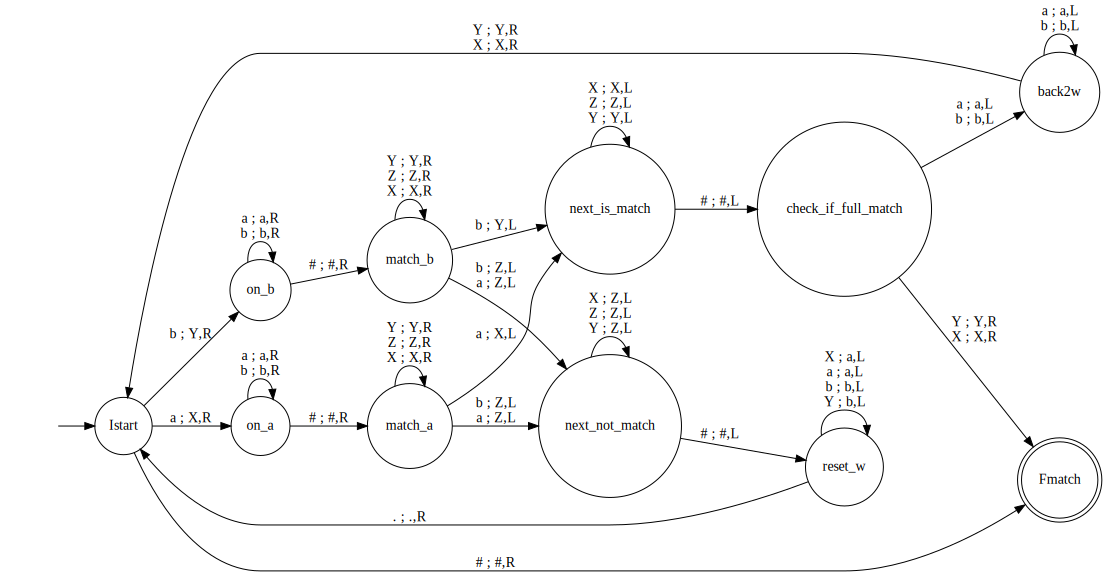

In [398]:
# w#x NDTM
Asg6NDTM =  md2mc(
'''
TM 
!!---------------------------------------------------------------------------
!! This is a DTM for recognizing strings of the form w#x 
!! where w, x are in {a,b}* and w is a substring of x
!!---------------------------------------------------------------------------

!!---------------------------------------------------------------------------
!! State : rd;wr , mv -> tostates !! comment
!!---------------------------------------------------------------------------

Istart : a;X , R -> on_a    !! convert a to X and search for matching a on other side of #
Istart : b;Y , R  -> on_b   !! convert b to b and search for matching b on other side of #		  
Istart : #;# , R -> Fmatch  !! If we see # right away, then w is epsilon and therefore in x		  				  


!! In on_a, skip over the remaining a's and b's
!! until we get to the #
on_a : a;a , R | b;b , R -> on_a 
on_a : #;# , R  -> match_a      


!! look for a matching 'a' on the other side
match_a : X;X , R | Y;Y , R -> match_a  !! All X and Y are matched characters to skip over
match_a : Z;Z , R -> match_a            !! All Z's are not part of w

match_a : b;Z , L -> next_not_match     !! on a b, we know the current substring is not w

match_a : a;X , L  -> next_is_match     !! nondeterministically guess if a is in w 
match_a : a;Z , L -> next_not_match     !! (or not)



!! Move over all past X, Y, Z to get back to the # on the way to the w string
next_is_match : X;X , L | Y;Y , L | Z;Z , L -> next_is_match 
next_is_match : #;# , L  -> check_if_full_match
				  

check_if_full_match : a;a , L | b;b , L -> back2w !! If there are still letters to match, move to back2w
check_if_full_match : X;X , R | Y;Y , R -> Fmatch !! If there's an X or Y at the end of w, then we have a complete match


!! return to the end of the w string to check the next character
back2w : a;a , L | b;b , L -> back2w
back2w : X;X , R | Y;Y , R -> Istart


!! same as on_a, but for for a 'b' instead of an 'a'
on_b : a;a , R | b;b , R -> on_b
on_b : #;# , R  -> match_b


!! look for a matching a on the other side
match_b : X;X , R | Y;Y , R | Z;Z , R -> match_b  !! skip already checked ones

match_b : b;Y , L  -> next_is_match    !! nondeterministically guess if b is in w 
match_b : b;Z , L -> next_not_match    !! (or not)

match_b : a;Z , L -> next_not_match    !! a is not a match


next_not_match : Z;Z , L -> next_not_match  
next_not_match : X;Z , L -> next_not_match
next_not_match : Y;Z , L -> next_not_match
next_not_match : #;# , L -> reset_w


reset_w : X;a , L -> reset_w  !! reset the X/Y changes to the w string and look for it again after the Z's
reset_w : Y;b , L -> reset_w
reset_w : a;a , L -> reset_w
reset_w : b;b , L -> reset_w
reset_w : .;. , R -> Istart

'''   
    
)
dotObj_tm(Asg6NDTM, FuseEdges = True)

# # The following display(...) call is needed to see the animation buttons in Colab
# display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

# #---SET FUEL TO 100 OR SO, else there will be no animation shown---
# AnimateTM(Asg6NDTM, FuseEdges=True)


### Test Cases: The "fuel" argument of 50 may be increased as needed (start with 50 and that is good if all tests finish)

In [399]:
explore_tm(Asg6NDTM, "aba#aba",500)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('match_a', 15, '........Xba#ZZZ', 457)
 via .. 
 ->('Istart', 0, 'aba#aba', 500)
 ->('on_a', 1, 'Xba#aba', 499)
 ->('on_a', 2, 'Xba#aba', 498)
 ->('on_a', 3, 'Xba#aba', 497)
 ->('match_a', 4, 'Xba#aba', 496)
 ->('next_not_match', 3, 'Xba#Zba', 495)
 ->('reset_w', 2, 'Xba#Zba', 494)
 ->('reset_w', 1, 'Xba#Zba', 493)
 ->('reset_w', 0, 'Xba#Zba', 492)
 ->('reset_w', 7, '........aba#Zba', 491)
 ->('Istart', 8, '........aba#Zba', 490)
 ->('on_a', 9, '........Xba#Zba', 489)
 ->('on_a', 10, '........Xba#Zba', 488)
 ->('on_a', 11, '........Xba#Zba', 487)
 ->('match_a', 12, '........Xba#Zba', 486)
 ->('match_a', 13, '........Xba#Zba', 4

In [400]:
explore_tm(Asg6NDTM, "aba#ab",50)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('match_a', 14, '........Xba#ZZ', 22)
 via .. 
 ->('Istart', 0, 'aba#ab', 50)
 ->('on_a', 1, 'Xba#ab', 49)
 ->('on_a', 2, 'Xba#ab', 48)
 ->('on_a', 3, 'Xba#ab', 47)
 ->('match_a', 4, 'Xba#ab', 46)
 ->('next_not_match', 3, 'Xba#Zb', 45)
 ->('reset_w', 2, 'Xba#Zb', 44)
 ->('reset_w', 1, 'Xba#Zb', 43)
 ->('reset_w', 0, 'Xba#Zb', 42)
 ->('reset_w', 7, '........aba#Zb', 41)
 ->('Istart', 8, '........aba#Zb', 40)
 ->('on_a', 9, '........Xba#Zb', 39)
 ->('on_a', 10, '........Xba#Zb', 38)
 ->('on_a', 11, '........Xba#Zb', 37)
 ->('match_a', 12, '........Xba#Zb', 36)
 ->('match_a', 13, '........Xba#Zb', 35)
 ->('next_not_match', 12, '........Xba#ZZ', 34)
 ->('next_not_match', 11, '........Xba#ZZ', 33)
 ->('reset_w', 10, '........Xba#ZZ', 32)
 ->('reset_w

In [401]:
explore_tm(Asg6NDTM, "aba#baba",100)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('match_a', 16, '........Xba#ZZZZ', 40)
 via .. 
 ->('Istart', 0, 'aba#baba', 100)
 ->('on_a', 1, 'Xba#baba', 99)
 ->('on_a', 2, 'Xba#baba', 98)
 ->('on_a', 3, 'Xba#baba', 97)
 ->('match_a', 4, 'Xba#baba', 96)
 ->('next_not_match', 3, 'Xba#Zaba', 95)
 ->('reset_w', 2, 'Xba#Zaba', 94)
 ->('reset_w', 1, 'Xba#Zaba', 93)
 ->('reset_w', 0, 'Xba#Zaba', 92)
 ->('reset_w', 7, '........aba#Zaba', 91)
 ->('Istart', 8, '........aba#Zaba', 90)
 ->('on_a', 9, '........Xba#Zaba', 89)
 ->('on_a', 10, '........Xba#Zaba', 88)
 ->('on_a', 11, '........Xba#Zaba', 87)
 ->('match_a', 12, '........Xba#Zaba', 86)
 ->('match_a', 13, '........Xba#Zaba', 85)
 ->('next_not_match', 12, '........Xba#ZZba', 84)
 ->('next_not_match', 1

In [402]:
explore_tm(Asg6NDTM, "aba#babba",100)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('match_a', 17, '........Xba#ZZZZZ', 21)
 via .. 
 ->('Istart', 0, 'aba#babba', 100)
 ->('on_a', 1, 'Xba#babba', 99)
 ->('on_a', 2, 'Xba#babba', 98)
 ->('on_a', 3, 'Xba#babba', 97)
 ->('match_a', 4, 'Xba#babba', 96)
 ->('next_not_match', 3, 'Xba#Zabba', 95)
 ->('reset_w', 2, 'Xba#Zabba', 94)
 ->('reset_w', 1, 'Xba#Zabba', 93)
 ->('reset_w', 0, 'Xba#Zabba', 92)
 ->('reset_w', 7, '........aba#Zabba', 91)
 ->('Istart', 8, '........aba#Zabba', 90)
 ->('on_a', 9, '........Xba#Zabba', 89)
 ->('on_a', 10, '........Xba#Zabba', 88)
 ->('on_a', 11, '........Xba#Zabba', 87)
 ->('match_a', 12, '........Xba#Zabba', 86)
 ->('match_a', 13, '........Xba#Zabba', 85)
 ->('next_not_ma

In [403]:
explore_tm(Asg6NDTM, "bba#bbabba",50)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
There are still  8 truncated paths.
Detailing the halted configs now.
Accepted at  ('Fmatch', 3, 'YYX#YYXbba', 23)
 via .. 
 ->('Istart', 0, 'bba#bbabba', 50)
 ->('on_b', 1, 'Yba#bbabba', 49)
 ->('on_b', 2, 'Yba#bbabba', 48)
 ->('on_b', 3, 'Yba#bbabba', 47)
 ->('match_b', 4, 'Yba#bbabba', 46)
 ->('next_is_match', 3, 'Yba#Ybabba', 45)
 ->('check_if_full_match', 2, 'Yba#Ybabba', 44)
 ->('back2w', 1, 'Yba#Ybabba', 43)
 ->('back2w', 0, 'Yba#Ybabba', 42)
 ->('Istart', 1, 'Yba#Ybabba', 41)
 ->('on_b', 2, 'YYa#Ybabba', 40)
 ->('on_b', 3, 'YYa#Ybabba', 39)
 ->('match_b', 4, 'YYa#Ybabba', 38)
 ->('match_b', 5, 'YYa#Ybabba', 37)
 ->('next_is_match', 4, 'YYa#YYabba', 36)
 ->('next_is_match', 3, 'YYa#YYabba', 35)
 ->('check_if_full_match', 2, 'YYa#YYabba', 34)
 ->('back2w', 1, 'YYa#YYabba', 33)
 ->('Istart', 2, 'YYa#YYabba', 32)
 ->('on_a', 3, 'YYX#YYabba', 31)
 ->('match_a', 4, 'YY

### 5 Test Cases You Add

In [404]:
# Test 1
explore_tm(Asg6DTM, "a#bbbbbbbbba",200)
# accept because w is at the end of x

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('Fmatch', 9, '........X#ZZZZZZZZZX', 33)
 via .. 
 ->('Istart', 0, 'a#bbbbbbbbba', 200)
 ->('on_a', 1, 'X#bbbbbbbbba', 199)
 ->('match_a', 2, 'X#bbbbbbbbba', 198)
 ->('next_no_match', 1, 'X#bbbbbbbbba', 197)
 ->('setZ', 2, 'X#bbbbbbbbba', 196)
 ->('reset_w', 1, 'X#Zbbbbbbbba', 195)
 ->('reset_w', 0, 'X#Zbbbbbbbba', 194)
 ->('reset_w', 7, '........a#Zbbbbbbbba', 193)
 ->('Istart', 8, '........a#Zbbbbbbbba', 192)
 ->('on_a', 9, '........X#Zbbbbbbbba', 191)
 ->('match_a', 10, '........X#Zbbbbbbbba', 190)
 ->('match_a', 11, '........X#Zbbbbbbbba', 189)
 ->('next_no_match', 10, '........X#Zbbbbbbbba', 188)
 ->('setZ', 11, '........X#Zbbbbbbbba', 187)
 ->('reset_w', 10, '........X#ZZbbbbbbba', 186)
 ->('reset_w', 9, '........X#ZZbbbbbbba', 185)
 ->('reset_w', 8, '........X#ZZbbbbbbba', 184)
 ->('reset_w', 7, '........a#ZZbbbbbbba', 183)
 ->('Istart', 8, '........a#ZZbbbbbbba', 182)
 ->('on_a', 9, '........

In [405]:
# Test 2
explore_tm(Asg6DTM, "aaaba#aabaaaaaba",400)
# accept because x ends in w

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('Fmatch', 13, '........XXXYX#ZZZZZXXXYX', 15)
 via .. 
 ->('Istart', 0, 'aaaba#aabaaaaaba', 400)
 ->('on_a', 1, 'Xaaba#aabaaaaaba', 399)
 ->('on_a', 2, 'Xaaba#aabaaaaaba', 398)
 ->('on_a', 3, 'Xaaba#aabaaaaaba', 397)
 ->('on_a', 4, 'Xaaba#aabaaaaaba', 396)
 ->('on_a', 5, 'Xaaba#aabaaaaaba', 395)
 ->('match_a', 6, 'Xaaba#aabaaaaaba', 394)
 ->('next_is_match', 5, 'Xaaba#Xabaaaaaba', 393)
 ->('check_if_full_match', 4, 'Xaaba#Xabaaaaaba', 392)
 ->('back2w', 3, 'Xaaba#Xabaaaaaba', 391)
 ->('back2w', 2, 'Xaaba#Xabaaaaaba', 390)
 ->('back2w', 1, 'Xaaba#Xabaaaaaba', 389)
 ->('back2w', 0, 'Xaaba#Xabaaaaaba', 388)
 ->('Istart', 1, 'Xaaba#Xabaaaaaba', 387)
 ->('on_a', 2, 'XXaba#Xabaaaaaba', 386)
 ->('on_a', 3, 'XXaba#Xabaaaaaba', 385)
 ->('on_a', 4, 'XXaba#Xabaaaaaba', 384)
 ->('on_a', 5, 'XXaba#Xabaaaaaba', 383)
 ->('match_a', 6, 'XXaba#Xabaaaaaba', 382)
 ->('match_a', 7, 'XXaba#Xabaaaaaba', 381)
 ->('next_is_

In [406]:
# Test 3
explore_tm(Asg6DTM, "#aba",50)
# accept because w is the empty string (which is a substring of x)

Detailing the halted configs now.
Accepted at  ('Fmatch', 1, '#aba', 49)
 via .. 
 ->('Istart', 0, '#aba', 50)
 ->('Fmatch', 1, '#aba', 49)


In [407]:
# Test 4
explore_tm(Asg6DTM, "ababababa#bababababa",300)

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('Fmatch', 17, '........XYXYXYXYX#ZXYXYXYXYX', 69)
 via .. 
 ->('Istart', 0, 'ababababa#bababababa', 300)
 ->('on_a', 1, 'Xbabababa#bababababa', 299)
 ->('on_a', 2, 'Xbabababa#bababababa', 298)
 ->('on_a', 3, 'Xbabababa#bababababa', 297)
 ->('on_a', 4, 'Xbabababa#bababababa', 296)
 ->('on_a', 5, 'Xbabababa#bababababa', 295)
 ->('on_a', 6, 'Xbabababa#bababababa', 294)
 ->('on_a', 7, 'Xbabababa#bababababa', 293)
 ->('on_a', 8, 'Xbabababa#bababababa', 292)
 ->('on_a', 9, 'Xbabababa#bababababa', 291)
 ->('match_a', 10, 'Xbabababa#bababababa', 290)
 ->('next_no_match', 9, 'Xbabababa#bababababa', 289)
 ->('setZ', 10, 'Xbabababa#bababababa', 288)
 ->('reset_w', 9, 'Xbabababa#Zababababa', 287)
 ->('reset_w', 8, 'Xbabababa#Zababababa', 286)
 ->('reset_w', 7, 'Xbabababa#Zababababa', 285)
 ->('reset_w', 6, 'Xbabababa#Zababababa', 284)
 ->('reset_w', 5, 'Xbabababa#Zababababa', 283)
 ->('reset_w', 4, 'Xbabababa#Za

In [408]:
# Test 5
explore_tm(Asg6DTM, "bab#bbbabbb",100)
# accept because w is in the middle of x

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('Fmatch', 11, '........YXY#ZZYXYbb', 13)
 via .. 
 ->('Istart', 0, 'bab#bbbabbb', 100)
 ->('on_b', 1, 'Yab#bbbabbb', 99)
 ->('on_b', 2, 'Yab#bbbabbb', 98)
 ->('on_b', 3, 'Yab#bbbabbb', 97)
 ->('match_b', 4, 'Yab#bbbabbb', 96)
 ->('next_is_match', 3, 'Yab#Ybbabbb', 95)
 ->('check_if_full_match', 2, 'Yab#Ybbabbb', 94)
 ->('back2w', 1, 'Yab#Ybbabbb', 93)
 ->('back2w', 0, 'Yab#Ybbabbb', 92)
 ->('Istart', 1, 'Yab#Ybbabbb', 91)
 ->('on_a', 2, 'YXb#Ybbabbb', 90)
 ->('on_a', 3, 'YXb#Ybbabbb', 89)
 ->('match_a', 4, 'YXb#Ybbabbb', 88)
 ->('match_a', 5, 'YXb#Ybbabbb', 87)
 ->('next_no_match', 4, 'YXb#Ybbabbb', 86)
 ->('next_no_match', 3, 'YXb#bbbabbb', 85)
 ->('setZ', 4, 'YXb#bbbabbb', 84)
 ->('reset_w', 3, 'YXb#Zbbabbb', 83)
 ->('reset_w', 2, 'YXb#Zbbabbb', 82)
 ->('reset_w', 1, 'YXb#Zbbabbb', 81)
 ->('reset_w', 0, 'Yab#Zbbabbb', 80)
 ->('reset_w', 7, '........bab#Zbbabbb', 79)
 ->('Istart', 8, '........bab#Zb

# END
